# Projet 1 : Analyse de la production de miel aux USA (1998-2012)

Dans ce projet, on va faire du machine learning supervisé. Il s'agira de voir comment marche la régression linéaire. Je vais travailler sur des données réelles [Kaggle](https://www.kaggle.com/jessicali9530/honey-production/data?select=honeyproduction.csv)
On veut savoir quelle sera la production du miel dans les années à venir aux USA.

## Les bibliothèques the base  

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model


## Importons les données 

In [7]:
miel_df = pd.read_csv('datasets_20465_26638_honeyproduction.csv')
print(miel_df.head())

  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  


## Mise en forme des données 

On veut donc savoir la productin de miel par années si on veut faire des prédictions sur les années à venir.

In [12]:
prod_par_an = miel_df.groupby('year').totalprod.mean().reset_index()
print(prod_par_an.year)

0     1998
1     1999
2     2000
3     2001
4     2002
5     2003
6     2004
7     2005
8     2006
9     2007
10    2008
11    2009
12    2010
13    2011
14    2012
Name: year, dtype: int64


In [17]:
X = prod_par_an.year
print(type(X))
X = X.values.reshape(-1,1)
print(type(X))
print(X)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[[1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]]


In [24]:
#Extractons la production total aussi 
y =  prod_par_an.totalprod      
#y = y.values.reshape(-1,1)

## Traçons le graphe en nuage de points

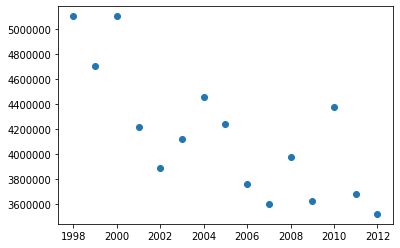

In [25]:
plt.scatter(X, y)
plt.show()

On peut voir une rélation linéaire entre les points

## Créons le modèle adapté avec données 

Créons on régression linéaire à partir `sklearn`

In [28]:
ml = linear_model.LinearRegression()

Trouvons le modèle adapté à ces points

In [29]:
ml.fit(X, y)

LinearRegression()

Affichons donc les paramètres de la droite a et b dans `y = ax + b`

In [32]:
print("a     = " + str(ml.coef_[0]))
print("b     = " + str(ml.intercept_))

a     = -88303.18915238194
b     = 181208083.1073298


Maintenant qu'on a la doite, faisons une prédiction sur la valeur de X

In [34]:
y_predi = ml.predict(X)

Traçons la droite de prédiction dans le nuage de points

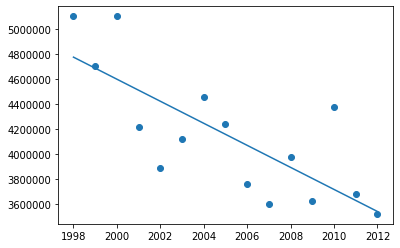

In [37]:
plt.scatter(X, y)
plt.plot(X, y_predi)
plt.show()

## Quelle sera la production de miel dans les années 2040

Creons des features du futures (2013-2040)

In [41]:
X_an_futur = np.array(range(2013,2040))
X_an_futur = X_an_futur.reshape(-1, 1)

Predisons la tendence à partir de 2013

In [42]:
y_prod_futur = ml.predict(X_an_futur)

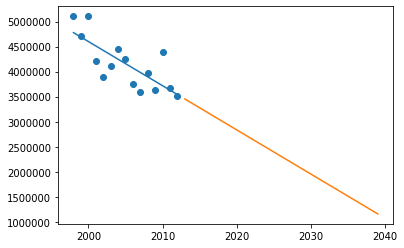

In [43]:
plt.scatter(X, y)
plt.plot(X, y_predi)
plt.plot(X_an_futur, y_prod_futur)
plt.show()